In [1]:
import pandas as pd


In [8]:
df = pd.read_csv('DecisionTree.csv')
df.head()

,Day,outlook,temp,humidity,wind,play
0,d1,sunny,hot,high,weak,no
1,d2,sunny,hot,high,strong,no
2,d3,overcast,hot,high,weak,yes
3,d4,rain,mild,high,weak,yes
4,d5,rain,cool,normal,weak,yes


In [9]:
df.isnull().sum()

Day         0
outlook     0
temp        0
humidity    0
wind        0
play        0
dtype: int64

In [10]:
df = df.drop('Day',axis=1)
df

,outlook,temp,humidity,wind,play
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [12]:
y = df['play']
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object

In [23]:
x = df.drop('play',axis=1)
x

,outlook,temp,humidity,wind
0,sunny,hot,high,weak
1,sunny,hot,high,strong
2,overcast,hot,high,weak
3,rain,mild,high,weak
4,rain,cool,normal,weak
5,rain,cool,normal,strong
6,overcast,cool,normal,strong
7,sunny,mild,high,weak
8,sunny,cool,normal,weak
9,rain,mild,normal,weak


In [24]:
# Preprocessing
from sklearn.preprocessing import LabelEncoder



In [25]:
le = LabelEncoder()

In [26]:
x.outlook = le.fit_transform(df['outlook'])
x.head

<bound method NDFrame.head of     outlook  temp humidity    wind
0         2   hot     high    weak
1         2   hot     high  strong
2         0   hot     high    weak
3         1  mild     high    weak
4         1  cool   normal    weak
5         1  cool   normal  strong
6         0  cool   normal  strong
7         2  mild     high    weak
8         2  cool   normal    weak
9         1  mild   normal    weak
10        2  mild   normal  strong
11        0  mild     high  strong
12        0   hot   normal    weak
13        1  mild     high  strong>

In [27]:
x.temp = le.fit_transform(df['temp'])
x.humidity = le.fit_transform(df['humidity'])
x.wind = le.fit_transform(df['wind'])

In [28]:
x.head()

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


In [43]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [44]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [45]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
clf.predict([[2,1,0,1]])  # sunny=2, hot=1,high=0,weak=1

c:\Users\hp432\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [47]:
clf.predict([[1,0,1,1]])

c:\Users\hp432\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['yes'], dtype=object)

In [48]:
from sklearn import tree

[Text(0.4444444444444444, 0.9, 'x[0] <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'x[2] <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'x[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[3] <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'entropy = 0.0\nsamples = 1\nvalu

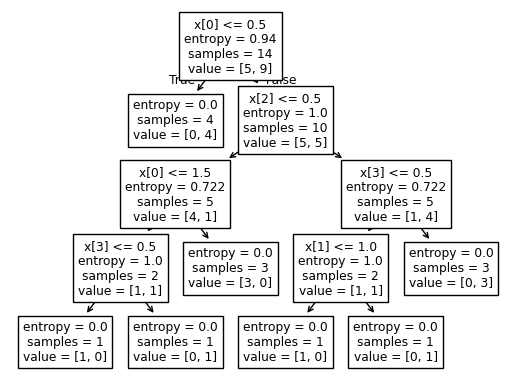

In [49]:
tree.plot_tree(clf)

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

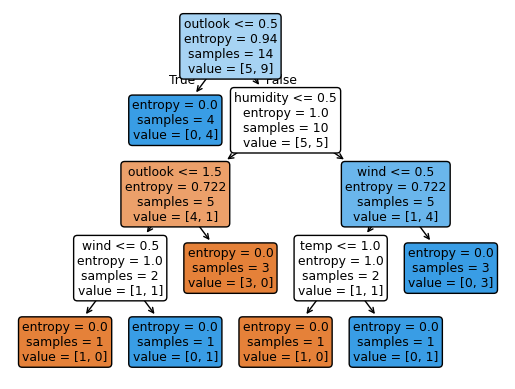

In [51]:
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)
import matplotlib.pyplot as plt
plt.figure
